## Named Entity Recognition (NER)

It involves in spotting named entities (people, places, organizations etc.) from a chunk of text, and classifying them into a predefined set of categories.

### Why it is important?

In order to understand the meaning from a given text (for ex a tweet or document), it is important to identify who did what to whom. Named entity recognition is the first task of identifying the words which may represnt the who, what and whom in the text. It helps in identifying the major entities the text is talking about.


#### Use Cases of Named Entity Recognition:
- Classifying content for news providers : Named Entity Recognition can automatically scan entire articles and reveal which are the major people, organizations, and places discussed in them.
- Powering Content Recommendations : This can be done by extracting entities from a particular article and recommending the other articles which have the most similar entities mentioned in them.
- and many more ..

In [15]:
# Download the model :
import nltk
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\monik\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [16]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\monik\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [17]:
text= "Apple acquired Zoom in China on Wednesday 6th May 2020.\
    This news has made Apple and Google stock jump by 5% on Dow Jones Index in the \
    United States of America"

In [18]:
# tokenize to words
words = nltk.word_tokenize(text.lower())
words

['apple',
 'acquired',
 'zoom',
 'in',
 'china',
 'on',
 'wednesday',
 '6th',
 'may',
 '2020.',
 'this',
 'news',
 'has',
 'made',
 'apple',
 'and',
 'google',
 'stock',
 'jump',
 'by',
 '5',
 '%',
 'on',
 'dow',
 'jones',
 'index',
 'in',
 'the',
 'united',
 'states',
 'of',
 'america']

In [19]:
# handle stop_words and puctuation:

import string
from nltk.corpus import stopwords

stop_word = stopwords.words("english")
punch = string.punctuation

clean_list = []

for word in set(words):
    if(word not in stop_word and word not in punch):
        clean_list.append(word)
clean_list

['united',
 'may',
 'china',
 'america',
 'made',
 'google',
 '6th',
 'index',
 'apple',
 'states',
 'news',
 '5',
 'dow',
 'jones',
 'acquired',
 '2020.',
 'wednesday',
 'zoom',
 'jump',
 'stock']

In [20]:
# Part of speech tagging

title_word  = [word.title() for word in clean_list]
pos_tag = nltk.pos_tag(title_word)
name_entity = nltk.ne_chunk(pos_tag)

for chunk in name_entity:
    if hasattr(chunk,'label'):
        print(chunk)

(GPE United/NNP)
(GPE China/NNP)
(ORGANIZATION America/NNP Made/NNP)
(PERSON Jones/NNP Acquired/NNP)


In [21]:
# see in datafram form:

import pandas as pd
entities =[]
labels =[]
for chunk in name_entity:
    if hasattr(chunk,'label'):
        entities.append(' '.join(c[0] for c in chunk))
        labels.append(chunk.label())
        
entities_labels = list(set(zip(entities, labels)))
entities_df = pd.DataFrame(entities_labels)
entities_df.columns = ["Entities","Labels"]
entities_df



,Entities,Labels
0,United,GPE
1,Jones Acquired,PERSON
2,China,GPE
3,America Made,ORGANIZATION


* No library is 100% perfect as we can see it is able to recognize the GPE(Geo-Political Entity) china, America.But not able to recognize : Google,Apple as organization etc.
* There are other libraries like Spacy and Stanford NLP which may improve this problem.

### There is on more important method called Frequency distributer : 
 -  It is used to find the frequency of each word occurring in a document. 

In [22]:
# import
from nltk import FreqDist

In [23]:
freq = FreqDist(nltk.word_tokenize(text))
freq

# will show each word is repesting how many times in the given text.

FreqDist({'Apple': 2, 'in': 2, 'on': 2, 'acquired': 1, 'Zoom': 1, 'China': 1, 'Wednesday': 1, '6th': 1, 'May': 1, '2020': 1, ...})

In [24]:
print(freq)
# 28 unique words in total 31 words.

<FreqDist with 30 samples and 33 outcomes>


In [25]:
# specific words count

freq["Apple"]

2

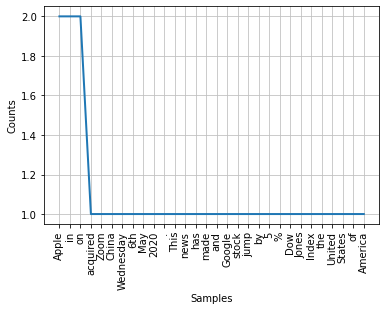

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [26]:
# freq distributor graph:

freq = FreqDist(nltk.word_tokenize(text))
freq.plot()

# graph show the count of each word repeating

In [27]:
# count each word with percentage:

total = len(words)

for k,v in freq.items():
    percent = round((v/total) *100,2)
    print(f"{k} is: {percent} % of total")

Apple is: 6.25 % of total
acquired is: 3.12 % of total
Zoom is: 3.12 % of total
in is: 6.25 % of total
China is: 3.12 % of total
on is: 6.25 % of total
Wednesday is: 3.12 % of total
6th is: 3.12 % of total
May is: 3.12 % of total
2020 is: 3.12 % of total
. is: 3.12 % of total
This is: 3.12 % of total
news is: 3.12 % of total
has is: 3.12 % of total
made is: 3.12 % of total
and is: 3.12 % of total
Google is: 3.12 % of total
stock is: 3.12 % of total
jump is: 3.12 % of total
by is: 3.12 % of total
5 is: 3.12 % of total
% is: 3.12 % of total
Dow is: 3.12 % of total
Jones is: 3.12 % of total
Index is: 3.12 % of total
the is: 3.12 % of total
United is: 3.12 % of total
States is: 3.12 % of total
of is: 3.12 % of total
America is: 3.12 % of total


In [28]:
# count no. of senteces in the fiven text:

check =  "I ate fruit the entire day. For breakfast, I had dates. For lunch, I had mangoes. For dinner, I had cantaloupe."

freq = FreqDist(nltk.sent_tokenize(check))
print(f"Total sentenecs in the given text is : {len(freq)}")

Total sentenecs in the given text is : 4
